TP 1 : JEU DE LA VIE - GAME OF LIFE 

SAYD YASSINE - M1 MIND UNIVERSITE DES SCIENCES DE MONTPELLIER 









In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

Question 1 : Création de la chaine de caractères filename=HMMA238_TP_saydyassine.ipynb

In [4]:
filename = "HMMA238_TP_saydyassine.ipynb"
print('mon fichier est nommé ' + filename)

mon fichier est nommé HMMA238_TP_saydyassine.ipynb


Question 2 : Création d'une variable taille_str qui compte le nombre de caractères dans la chaîne de caractères filename.

In [6]:
taille_str = len(filename)
print('Le nom de caractères dans la chaîne de caractères est de', taille_str)

Le nom de caractères dans la chaîne de caractères est de 28


Question 3 : Création d'une variable ma_graine qui vaut le reste de la division euclidienne de taille_str par 6

In [8]:
ma_graine = taille_str % 6
print('le reste de la div.euc de ma graine par 6 est', ma_graine)

le reste de la div.euc de ma graine par 6 est 4


Implémentation sans numpy : 

On va fournir dessous le code pure Python pour coder ce jeux. Dans la suite on va coder les cellules vivantes par des 1 et les cellules mortes par des 0

Question 4 : Tout d'abord on définit la fonction calcul_nb_voisins :

In [9]:
def calcul_nb_voisins(Z): 
    forme = len(Z), len(Z[0]) 
    N = [[0, ] * (forme[0]) for i in range(forme[1])] 
    for x in range(1, forme[0] - 1): 
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] + Z[x-1][y] + 0 +Z[x+1][y] + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
            
    return N

Cette fonction calcule le nombre de cellules voisines vivantes de chaque autre cellule.

Appliquons maintenant la fonction précédente à la liste (de liste) Z suivante : 

In [10]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

N = calcul_nb_voisins(Z)
print(N)

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


La sortie N donne une liste de listes de même taille que Z (6,6) , de sorte que les N donnent le nombre de voisins vivants de la cellule de Z correspondante.

On définit ensuite la fonction iteration_jeu comme suit et on rajoute une docstring pour cette fonction décrivant les entrées / sorties et ce que retourne la fonction : 

In [11]:
def iteration_jeu(Z):
     forme = len(Z), len(Z[0])
     N = calcul_nb_voisins(Z)
     for x in range(1, forme[0]-1):
        for y in range(1, forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
                
                
     return Z

Cette fonction permet de faire une simulation d'un tour du jeu pour une liste Z, elle affiche notamment 0 en cas de mort et 1 en cas de naissance.

In [12]:
print(iteration_jeu(Z))

[[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


Question 5 : Dans cette question on se propose pour la liste Z ci-dessus d'afficher les étapes du jeu de 0 à 9 itérations, en utilisant une boucle for. On utilisera la fonction subplot de matplotlib pour afficher sur 2 lignes et 5 colonnes ces 10 matrices. De plus on devra transformer ces listes en array pour pouvoir utiliser la fonction imshow de matplotlib : 

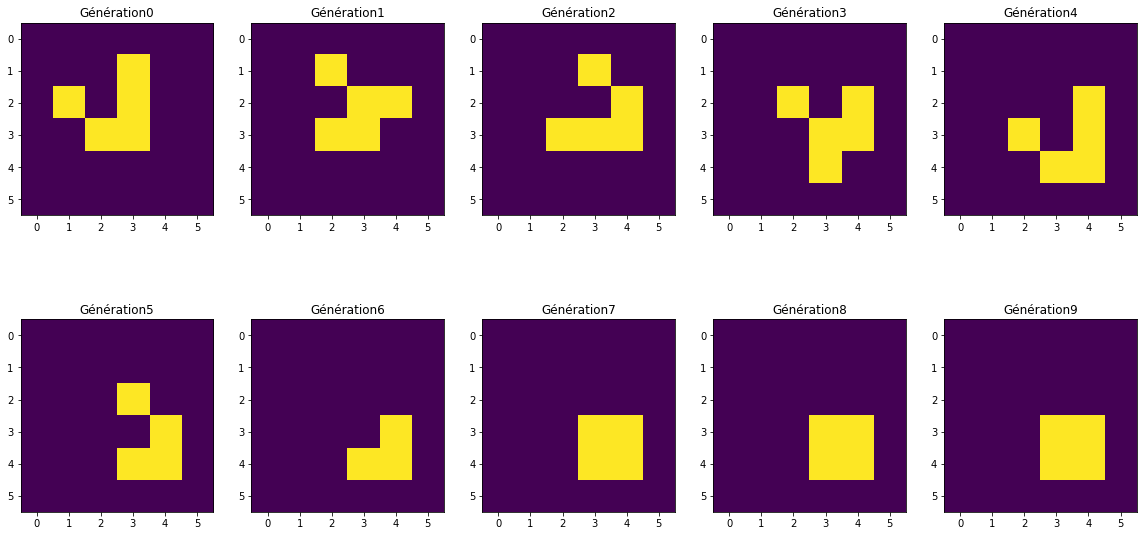

In [26]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

plt.figure(figsize=(20,10))

for i in range (0, 10):
        plt.subplot(2,5,i+1)
        Z=np.array(Z)
        plt.imshow(Z)
        Z=iteration_jeu(Z)
        plt.title('Itération' + str(i))

Question 6 : Nous remarquons qu'entre l'itération 0 et l'itération 4 les cellules vivantes se dirigent vers le bas du côté droit et que les itérations 0 et 4 ont la méme allure. En contre partie, à partir de l'itération 7, les cellules vivantes ne se déplacent plus, ceci est dù au fait qu'elles ont 3 cellules voisines vivantes chacune, ce qui leur permet de rester vivantes. 

Implémentation avec numpy : 

Question 7 : Pour le vecteur vec suivant, exprimons ce que vaut le vecteur nb_vect défini comme suit : 

In [27]:
vect = np.array([0,1,0,0,1,1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])

nb_vect

array([0., 0., 1., 1., 1., 0.])

Question 8 : Maintenant on va se servir de la question précédente (et du slicing donc) pour créer une fonction calcul_nb_voisins_np, cette fois sur des array, qui prend en entrée une matrice Z et qui ressort le nombre de voisins pour chaque entrée (et qui vaut zéro sur le pourtour). On utilisera donc 8 types de slicing pour obtenir le nombre de voisins : 

In [28]:
def calcul_nb_voisins_np(Z):
    Z = np.array(Z)
    nb_voisins_np = np.zeros(Z.shape) 
    nb_voisins_np[1:-1, 1:-1] = Z[1:-1, :-2] + \
    Z[:-2, :-2] +Z[:-2, 2:] + Z[2:, 2:] + Z[2:, :-2] + \
    Z[1:-1, 2:] + Z[:-2, 1:-1] + Z[2:, 1:-1]
    return(nb_voisins_np)

calcul_nb_voisins_np(Z)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 2., 2., 0.],
       [0., 0., 2., 3., 3., 0.],
       [0., 0., 2., 3., 3., 0.],
       [0., 0., 0., 0., 0., 0.]])

Question 9 :  Création d'une fonction iteration_jeu_np, similaire à iteration_jeu mais qui prend comme entrée sortie des numpy array et non plus des listes de listes. On se servira bien sûr de la question précédente pour cela : 

In [29]:
def iteration_jeu_np(Z):
    Z = np.array(Z)
    N = calcul_nb_voisins_np(Z)
    for x in range(1, np.shape(Z)[0]-1):
        for y in range(1, np.shape(Z)[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return(Z)

In [30]:
print(iteration_jeu_np(Z))

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]


Question 10 : Création d'une fonction jeu_np qui prend en entrée une matrice initiale Z_in et un nombre d'itérations nb_iter et sort une matrice (de même taille que Z_in) décrivant l'état du jeu de la vie après nb_iter itérations : 

In [31]:
def jeu_np(Z_in, nb_iter):
    
    for i in range(1, nb_iter+1):
        
        Z_in = iteration_jeu_np(Z_in)
        
    return(Z_in)

Question 11 : Affichage d'un film (avec la commande animation.FuncAnimation de matplotlib) qui représente les itérations du jeu de la vie quand on initialise avec la matrice Z_huge comme suit : 

In [32]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np
Z_huge

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<IPython.core.display.Javascript object>


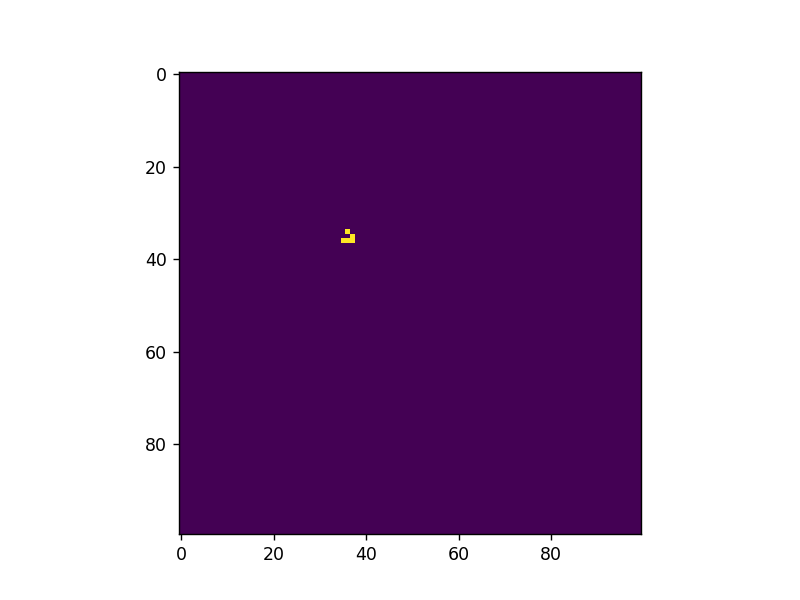

<IPython.core.display.Javascript object>


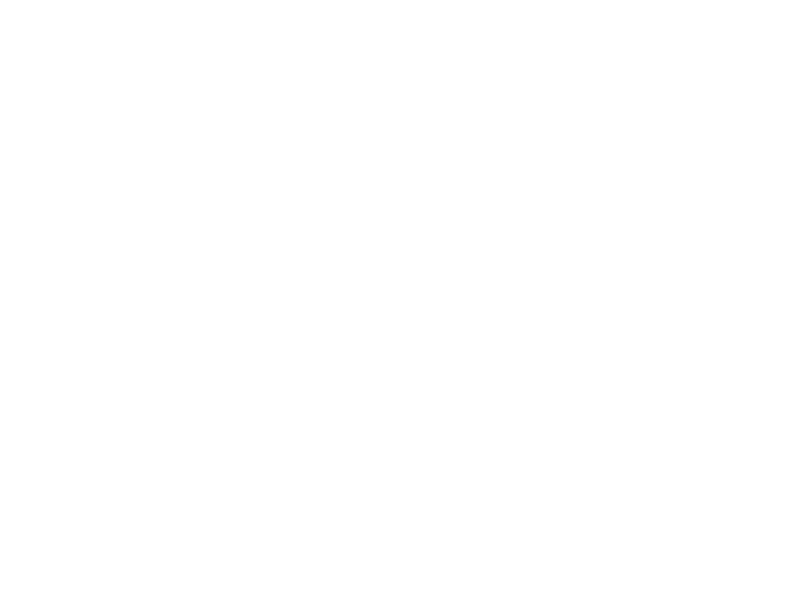

In [37]:
def mon_film(Z_in, nb_iter):
    
    figure = plt.imshow(Z_in)
    
    def anim(nb_iter):
        figure.set_data(jeu_np(np.array(Z_in), nb_iter))
        return figure
    
    result = animation.FuncAnimation(plt.figure(), anim, frames=nb_iter)
    return result


%matplotlib notebook
mon_film(Z_huge, 100)

Question 12 : Reprenons la question précédente en initialisant de la manière suivante : créer un matrice aléatoire de taille 100ˆ100, remplie de 1 et de 0, et dont la proportion de 1 est (en espérance) égale à (1 + ma_graine) * 10 / 100 : 

In [38]:
prop_active = (1 + ma_graine) * 10 / 100
print(prop_active)

0.5


<IPython.core.display.Javascript object>


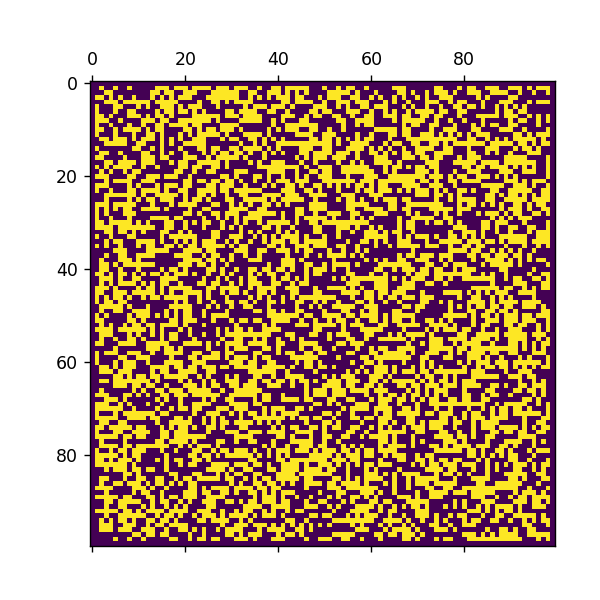

In [47]:
Z_huge = np.zeros((100, 100))
Z_huge[1:-1, 1:-1] = np.random.binomial(1,0.5,(98,98))
plt.matshow(Z_huge)

Question 13 :  Maintenant, on va proposer et afficher avec plt.imshow() des matrices (et 10 itérations d'un jeu initialisé avec elles) de taille 50ˆ50. Tout d'abord on le fait pour trois matrices simples qui représentent des jeux qui sont fixes dans le temps (configuration stables)

<IPython.core.display.Javascript object>


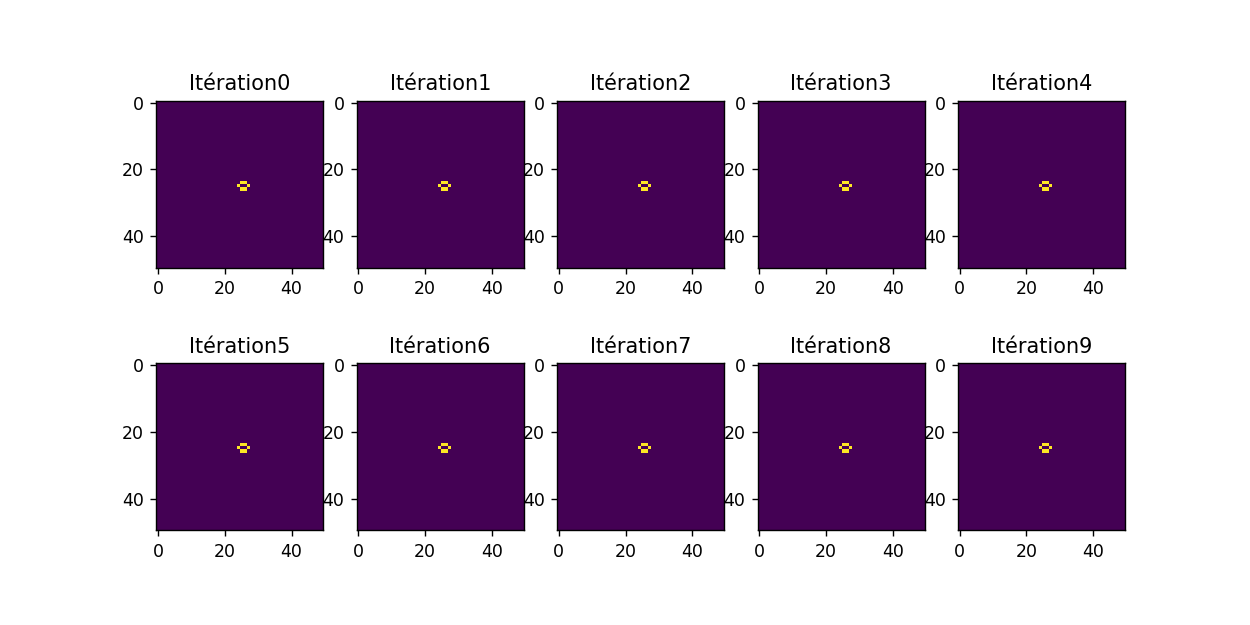

In [50]:
MR = np.zeros((50, 50)) 
MR[24, 25] = MR[24, 26] = MR[25, 24] = MR[25, 27] = MR[26, 25] = MR[26, 26] = 1
plt.figure(figsize=(10,5))
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    plt.imshow(iteration_jeu_np(MR))
    plt.title('Itération' + str(i))

<IPython.core.display.Javascript object>


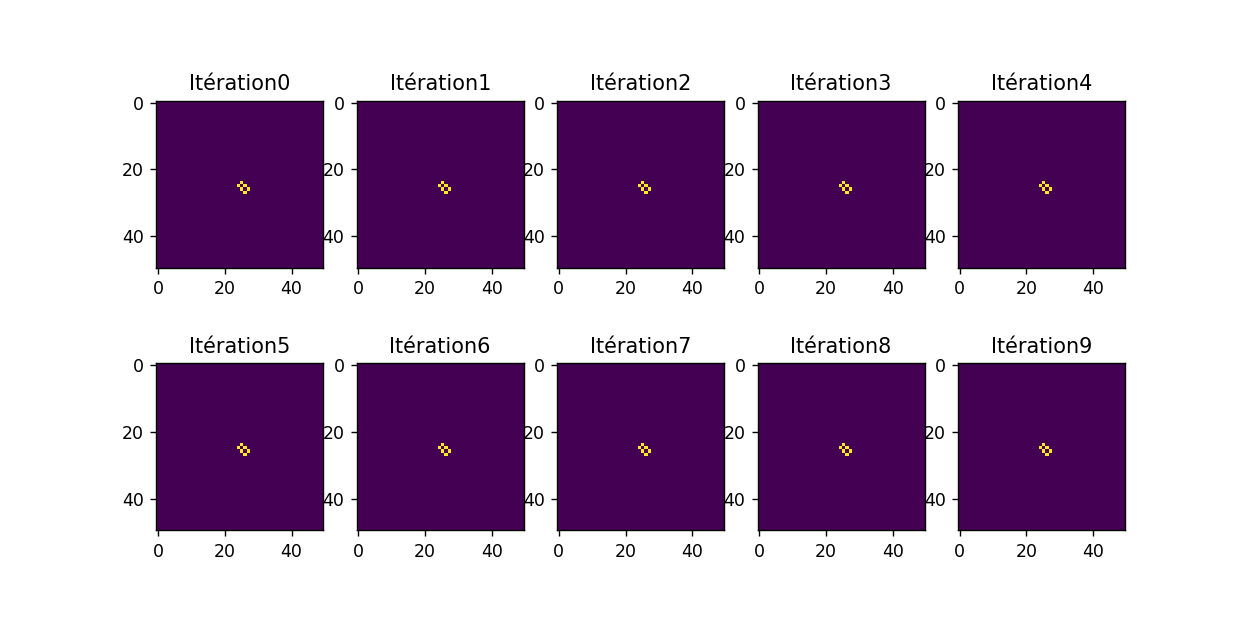

In [51]:
MT= np.zeros((50,50))
MT[24, 25] = MT[25, 24] = MT[25, 26] = MT[26, 25] = MT[26, 27] = MT[27, 26] = 1
plt.figure(figsize=(10,5))
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    plt.imshow(iteration_jeu_np(MT))
    plt.title('Itération' + str(i))

<IPython.core.display.Javascript object>


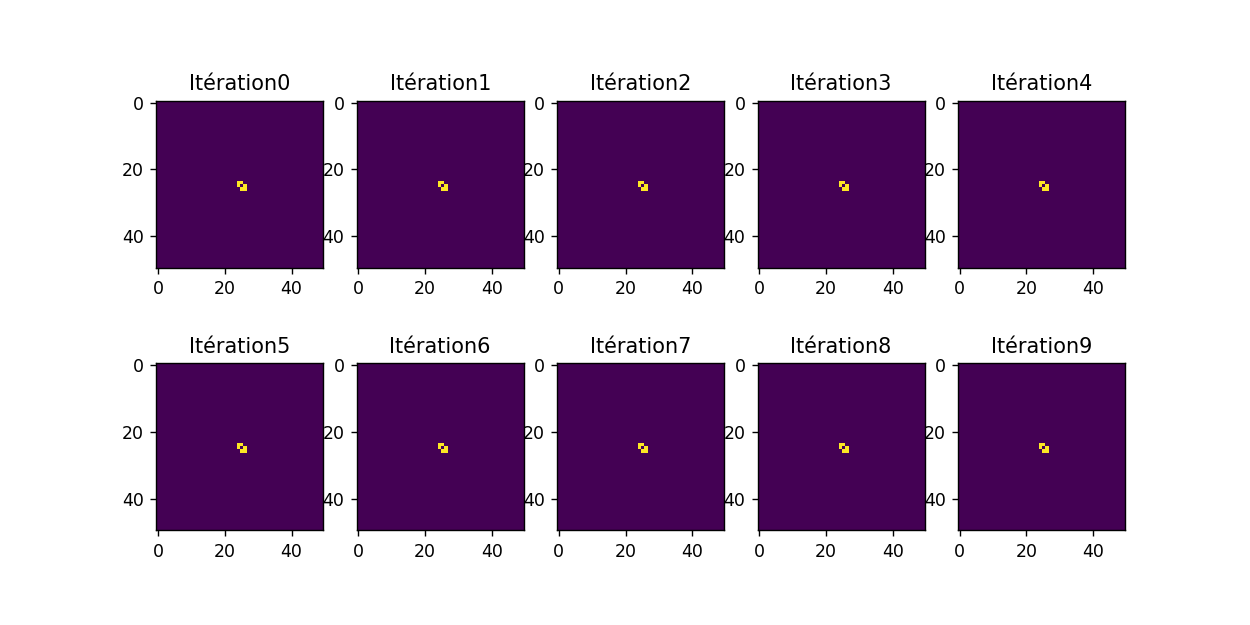

In [52]:
MN = np.zeros((50, 50)) 
MN[24, 24] = MN[24, 25] = MN[25,24] = MN[25, 26] = MN[26, 25] = MN[26, 26] = 1
plt.figure(figsize=(10,5))
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    plt.imshow(iteration_jeu_np(MN))
    plt.title('Itération' + str(i))

Faisons de méme pour une matrice qui représente un jeu dont l'état oscille avec une période de deux (et qui ne comporte pas uniquement des valeurs nulles) :

<IPython.core.display.Javascript object>


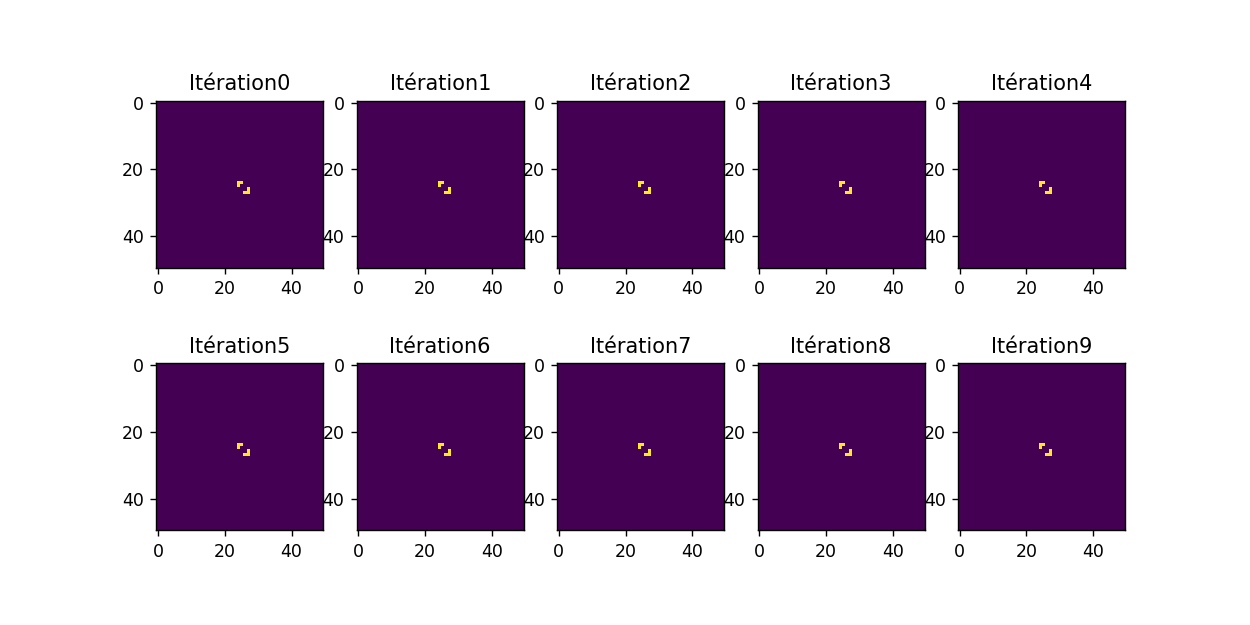

In [56]:
M2 = np.zeros((50,50))
M2[24,24]=M2[25,24]=M2[25,25]=M2[24,25]=M2[26,26]=M2[27,26]=M2[27,27]=M2[26,27]=1
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(iteration_jeu_np(M2))
    plt.title('Itération' + str(i))